In [1]:
# Decision trees are the basic model for classification.
# They can even be done in SQL to extend to many uses.

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=1000, n_features=3,
                           n_redundant=0)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [7]:
preds = dt.predict(X)
(y == preds).mean()

1.0

In [8]:
# Controlling the Max Depth makes smaller trees which generalize
# better for more complex datasets.

In [14]:
n_features=200
X, y = make_classification(750, n_features, n_informative=5)

In [15]:
import numpy as np
training = np.random.choice([True, False], p=[.75, .25],
                            size=len(y))

In [16]:
accuracies = []

In [17]:
for x in np.arange(1, n_features+1):
    dt = DecisionTreeClassifier(max_depth=x)
    dt.fit(X[training], y[training])
    
    preds = dt.predict(X[~training])
    accuracies.append((preds == y[~training]).mean())

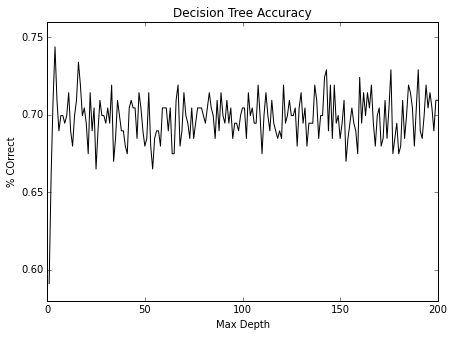

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))
ax.plot(range(1, n_features+1), accuracies, color='k')
ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% COrrect")
ax.set_xlabel("Max Depth")

In [19]:
# Figure above looks like we get good accuracy between 1 and 20

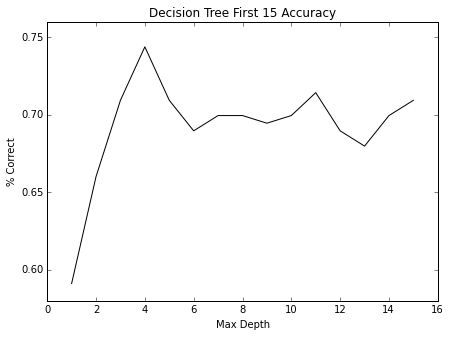

In [27]:
N = 15
f, ax = plt.subplots(figsize=(7,5))
ax.plot(range(1, n_features+1)[:N], accuracies[:N], color='k')
ax.set_title("Decision Tree First {} Accuracy".format(N))
ax.set_ylabel("% Correct")
ax.set_xlabel("Max Depth")